**country:** The name of the country for which the data is reported <br>
**country_code:** The ISO country code <br>
**year:** The year for which the data is reported <br>
**gov_exp_pct_gdp:** Government expenditure on education as a percentage of GDP <br>
**lit_rate_adult_pct:** Literacy rate for adults (ages 15 and above) as a percentage of the population <br>
**pri_comp_rate_pct:** Primary completion rate as a percentage of the relevant age group <br>
**pupil_teacher_primary:** Pupil-teacher ratio at the primary education level <br>
**pupil_teacher_secondary:** Pupil-teacher ratio at the secondary education level <br>
**school_enrol_primary_pct:** Primary school enrollment rate as a percentage of the population <br>
**school_enrol_secondary_pct:** Secondary school enrollment rate as a percentage of the population <br>
**school_enrol_tertiary_pct:** Tertiary school enrollment rate as a percentage of the population  <br>

In [2]:
#pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# reading csv file
worldeducation = pd.read_csv('world-education-data.csv')
worldeducation

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.381070
...,...,...,...,...,...,...,...,...,...,...,...
5887,Zimbabwe,ZWE,2018,2.05049,NaN,90.726250,NaN,NaN,97.879271,NaN,8.425119
5888,Zimbabwe,ZWE,2019,NaN,93.227547,90.232155,NaN,NaN,97.476614,NaN,9.995644
5889,Zimbabwe,ZWE,2020,NaN,NaN,91.866905,NaN,NaN,97.384162,NaN,9.723605
5890,Zimbabwe,ZWE,2021,NaN,NaN,86.099625,NaN,NaN,96.015148,NaN,NaN


In [5]:
#Missing Values in each Column

missing_values = worldeducation.isnull().sum()
total_rows = len(worldeducation)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': (missing_values / total_rows) * 100
})

print(missing_summary)

                            Missing Values  Percentage
country                                  0    0.000000
country_code                             0    0.000000
year                                     0    0.000000
gov_exp_pct_gdp                       1393   23.642227
lit_rate_adult_pct                    4015   68.143245
pri_comp_rate_pct                     1452   24.643585
pupil_teacher_primary                 2216   37.610319
pupil_teacher_secondary               2875   48.794976
school_enrol_primary_pct               540    9.164969
school_enrol_secondary_pct            1147   19.467074
school_enrol_tertiary_pct             1500   25.458248


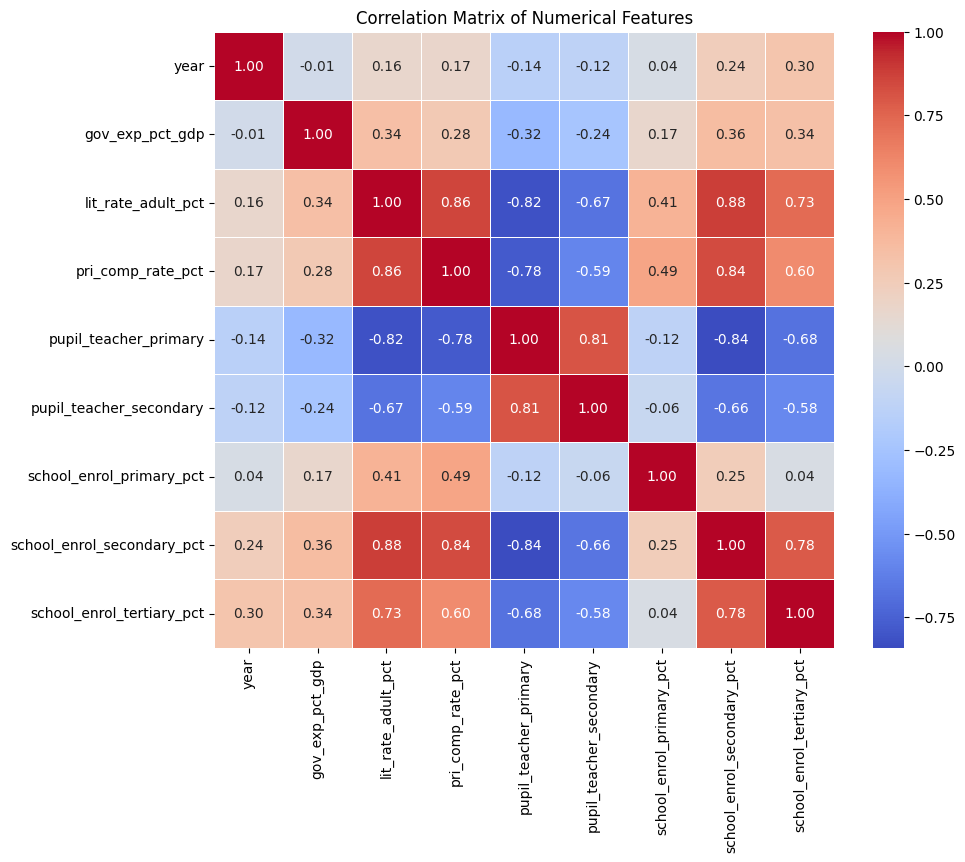

In [6]:
#Only use numerical columns/data
numerical_data = worldeducation.select_dtypes(include=['float64', 'int64'])

#Correlation Matrix
correlation_matrix = numerical_data.corr()

#plotting the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# <b>Interpreting the Correlation Matrix</b> <br>
The correlation matrix shows the relationships (Pearson correlation coefficients) between numerical variables in the dataset. <br><br>

#### <b>Highly Positively Correlated with lit_rate_adult_pct:</b><br>

<ul>
<li>pri_comp_rate_pct (0.858): Primary completion rates have a strong positive correlation with literacy rates, making them a significant predictor.</li> <br>
<li>school_enrol_secondary_pct (0.878): Secondary school enrollment is strongly correlated with literacy rates.</li> <br>
<li>school_enrol_tertiary_pct (0.730): Tertiary enrollment also shows a high correlation, though slightly weaker than secondary enrollment. </li><br><br>
</ul>

#### <b>Highly Negatively Correlated with lit_rate_adult_pct:</b><br>
<ul>
<li>pupil_teacher_primary (-0.818): A higher pupil-to-teacher ratio in primary education is strongly negatively correlated with literacy rates, indicating its significance. </li><br>
<li>pupil_teacher_secondary (-0.668): Secondary pupil-to-teacher ratio also shows a negative correlation.</li><br><br>
</ul>

#### <b>Moderately Correlated Predictors:</b><br>

<ul>
<li>gov_exp_pct_gdp (0.344): Government expenditure has a moderate positive correlation with literacy rates. <br>
</ul>

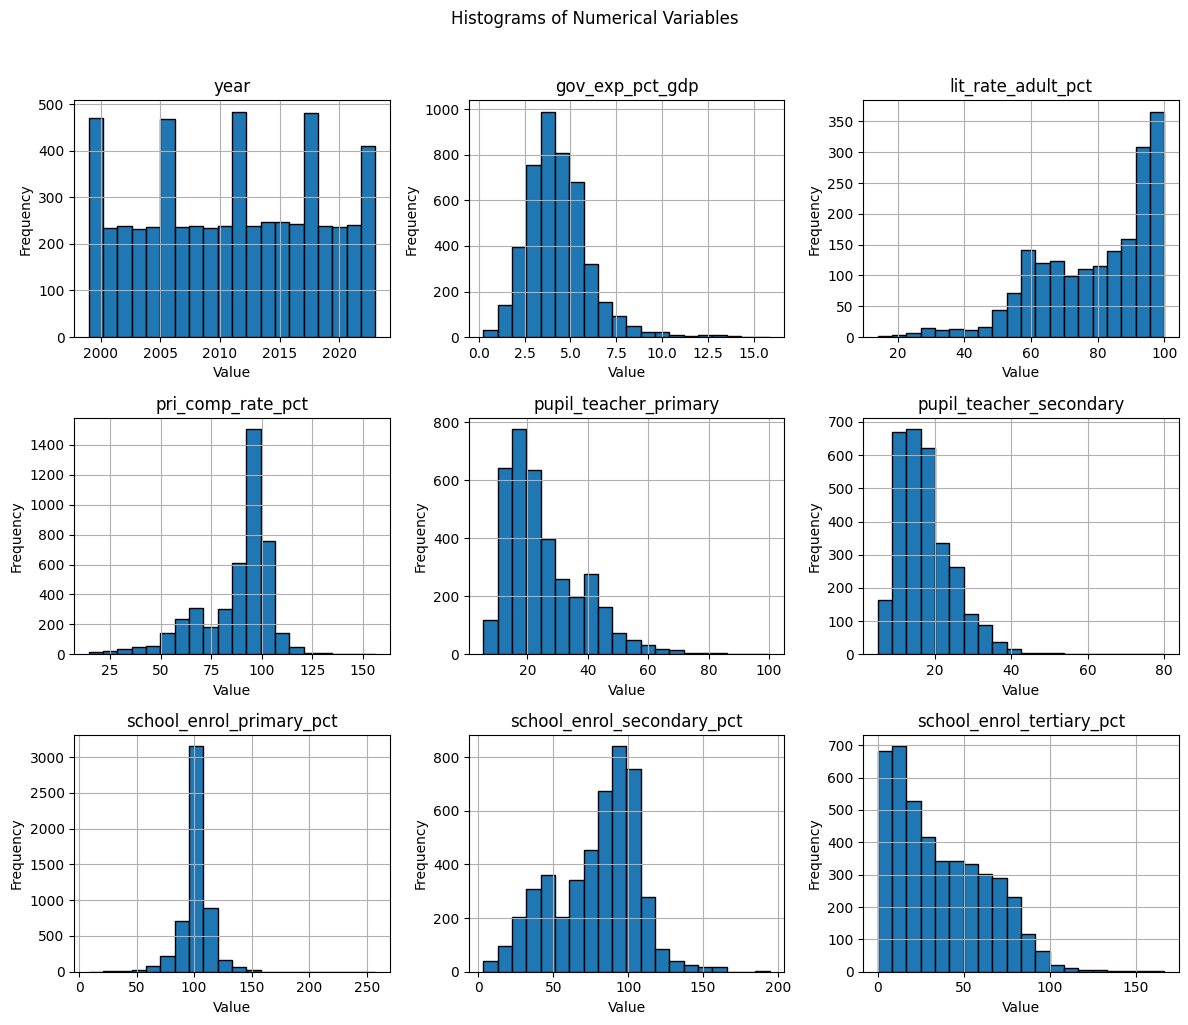

"\nFrom the histograms, we can infer the following about the dataset's numerical columns:\n\nyear:\n\nThis column appears to represent the time dimension of the dataset, with most data clustered in specific years (2000, 2005, 2010, 2015, 2020, etc.).\nSignificance: It's not directly meaningful for analysis but is essential for time-series trends or tracking changes over time.\ngov_exp_pct_gdp (Government Expenditure as % of GDP):\n\nThis distribution is slightly right-skewed, with most values concentrated between 2% and 10%. There are a few higher outliers.\nSignificance: It could be important when exploring correlations between government investment and literacy/education metrics.\nlit_rate_adult_pct (Adult Literacy Rate):\n\nThe distribution is strongly right-skewed, with many countries achieving near 100% literacy. There are a few with much lower literacy rates.\nSignificance: A critical column for analysis, especially since predicting missing literacy rates is your project goal.\np

In [7]:
# Plotting histograms
worldeducation.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', y=1.02)

#axis labels
for ax in plt.gcf().axes:
    ax.set_xlabel('Value')  # X-axis label
    ax.set_ylabel('Frequency')  # Y-axis label

plt.tight_layout()
plt.show()

'''
From the histograms, we can infer the following about the dataset's numerical columns:

year:

This column appears to represent the time dimension of the dataset, with most data clustered in specific years (2000, 2005, 2010, 2015, 2020, etc.).
Significance: It's not directly meaningful for analysis but is essential for time-series trends or tracking changes over time.
gov_exp_pct_gdp (Government Expenditure as % of GDP):

This distribution is slightly right-skewed, with most values concentrated between 2% and 10%. There are a few higher outliers.
Significance: It could be important when exploring correlations between government investment and literacy/education metrics.
lit_rate_adult_pct (Adult Literacy Rate):

The distribution is strongly right-skewed, with many countries achieving near 100% literacy. There are a few with much lower literacy rates.
Significance: A critical column for analysis, especially since predicting missing literacy rates is your project goal.
pri_comp_rate_pct (Primary Completion Rate):

This is nearly normally distributed, with a peak around 80–100%.
Significance: Highly correlated with lit_rate_adult_pct (per your correlation matrix). Could be a significant predictor.
pupil_teacher_primary (Pupil-Teacher Ratio in Primary Education):

The distribution is right-skewed, with most values below 40. This indicates that smaller class sizes are more common.
Significance: Its negative correlation with literacy rates indicates that lower pupil-teacher ratios might improve literacy outcomes.
pupil_teacher_secondary (Pupil-Teacher Ratio in Secondary Education):

Similar to the primary ratio, but slightly more evenly distributed.
Significance: Could also influence literacy rates or school enrollment percentages.
school_enrol_primary_pct (Primary School Enrollment Rate):

This is sharply concentrated between 90% and 100%, indicating high enrollment levels in primary education.
Significance: Might be less variable and thus less useful as a predictor.
school_enrol_secondary_pct (Secondary School Enrollment Rate):

More evenly distributed, with a peak around 60–80%.
Significance: Strongly correlated with literacy rates. This could be a key predictor.
school_enrol_tertiary_pct (Tertiary School Enrollment Rate):

Heavily right-skewed, with most values below 50%. Indicates lower global participation in tertiary education.
Significance: Likely secondary to primary and secondary education but still relevant for advanced analysis.
Significant Columns to Discuss
lit_rate_adult_pct: Primary target for prediction.
pri_comp_rate_pct: A strong predictor, as it directly relates to foundational education levels.
school_enrol_secondary_pct: Another key predictor due to its strong correlation with literacy rates.
pupil_teacher_primary: Negative correlation with literacy suggests class size impacts literacy.
gov_exp_pct_gdp: May be worth exploring as a policy-level factor influencing education outcomes.

'''


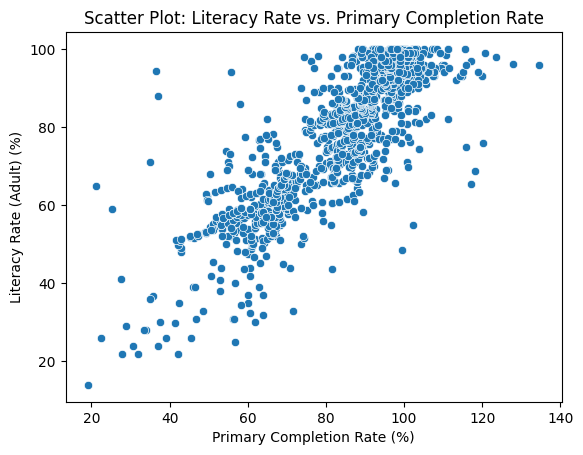

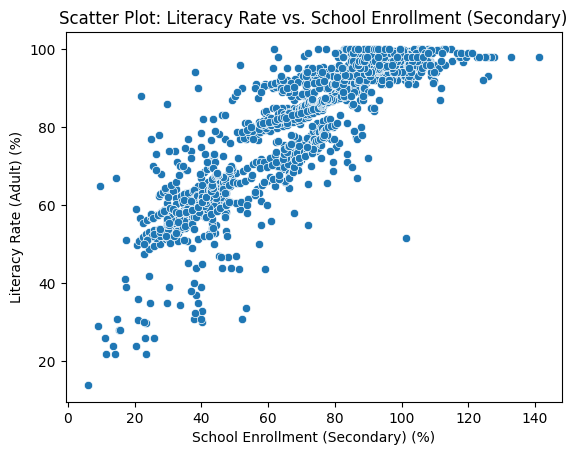

In [8]:
# Scatter Plot: Literacy rate vs. Primary Completion Rate
sns.scatterplot(x='pri_comp_rate_pct', y='lit_rate_adult_pct', data=worldeducation)
plt.title('Scatter Plot: Literacy Rate vs. Primary Completion Rate')
plt.xlabel('Primary Completion Rate (%)')
plt.ylabel('Literacy Rate (Adult) (%)')
plt.show()

# Scatter Plot: Literacy rate vs. School Enrollment (Secondary)
sns.scatterplot(x='school_enrol_secondary_pct', y='lit_rate_adult_pct', data=worldeducation)
plt.title('Scatter Plot: Literacy Rate vs. School Enrollment (Secondary)')
plt.xlabel('School Enrollment (Secondary) (%)')
plt.ylabel('Literacy Rate (Adult) (%)')
plt.show()


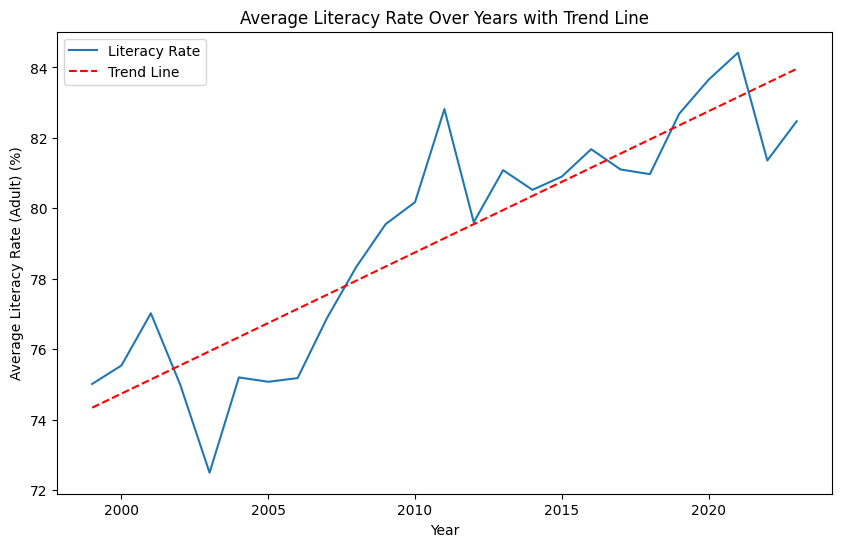

In [13]:
import numpy as np

# Aggregate data by year
yearly_trends = worldeducation.groupby('year')['lit_rate_adult_pct'].mean()

# Prepare data for regression
years = yearly_trends.index
lit_rates = yearly_trends.values

# Fit a linear regression line
coefficients = np.polyfit(years, lit_rates, 1)  # 1st degree polynomial (linear)
trend_line = np.poly1d(coefficients)

# Plot literacy trends with trend line
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=lit_rates, label='Literacy Rate')
plt.plot(years, trend_line(years), color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.title('Average Literacy Rate Over Years with Trend Line')
plt.xlabel('Year')
plt.ylabel('Average Literacy Rate (Adult) (%)')
plt.legend()
plt.show()

In [10]:
if 'region' in worldeducation.columns:
    regional_trends = worldeducation.groupby(['year', 'region'])['lit_rate_adult_pct'].mean().unstack()
    regional_trends.plot(kind='line', figsize=(10, 6), title='Regional Literacy Rates Over Time')
    plt.ylabel('Literacy Rate (%)')
    plt.show()


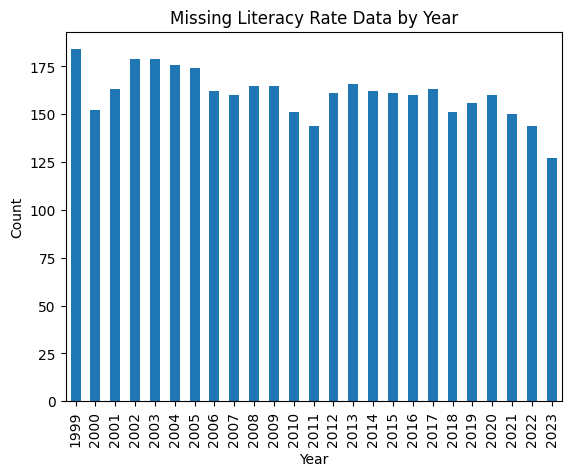

In [11]:
missing_data = worldeducation[worldeducation['lit_rate_adult_pct'].isnull()]
missing_counts = missing_data['year'].value_counts().sort_index()
missing_counts.plot(kind='bar', title='Missing Literacy Rate Data by Year', xlabel='Year', ylabel='Count')
plt.show()


In [12]:
plt.figure(figsize=(10, 5))
plt.plot(avg_lit_rate, label='Literacy Rate (%)')
plt.plot(worldeducation.groupby('year')['gov_exp_pct_gdp'].mean(), label='Gov. Exp. on Education (% GDP)')
plt.legend()
plt.title('Comparing Literacy Rates with Gov. Education Spending Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


NameError: name 'avg_lit_rate' is not defined

<Figure size 1000x500 with 0 Axes>